<a href="https://colab.research.google.com/github/bipin-a/Machine-Learning-Notes/blob/main/Feature_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c m5-forecasting-accuracy 
! unzip /content/m5-forecasting-accuracy.zip -d /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M5/


In [ ]:
! rm -R /content/drive/Shareddrives/BipinA/Neural_Networks_Data/*

In [ ]:
!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Test/Daily-test.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4

!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Train/Daily-train.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4

!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Train/Weekly-train.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4

!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Test/Weekly-test.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4


In [ ]:
!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Train/Monthly-train.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4

!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/Test/Monthly-test.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4


In [ ]:
!wget https://raw.githubusercontent.com/Mcompetitions/M4-methods/master/Dataset/M4-info.csv -P /content/drive/Shareddrives/BipinA/Neural_Networks_Data/M4


# Preprocessing Data

## M4

Remove Null and duplicate columns 

Combine train and test 

Analyze Data for different windows 
- SUM & AVERAGE
  - Weekly 
  - BiWeekly
  - Monthly 

Every quarter will be labeled 

In [ ]:
import logging
logger = logging.getLogger('fbprophet')
logger.setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
# logger = logging.getLogger()
# logger.setLevel(logging.CRITICAL)


In [ ]:
! pip install kats
! pip install prophet
# ! pip install modin[ray]

# import os

# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray



     |████████████████████████████████| 612 kB 9.2 MB/s 
     |████████████████████████████████| 9.5 MB 12.5 MB/s 
     |████████████████████████████████| 950 kB 48.4 MB/s 
     |████████████████████████████████| 310 kB 15.8 MB/s 
     |████████████████████████████████| 3.3 MB 61.1 MB/s 
     |████████████████████████████████| 347 kB 9.3 MB/s 
     |████████████████████████████████| 34.5 MB 13 kB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=9eb5062fb550a6f07f289fc607477e30501cffa7c57ddcc540d5f31b74aab5e5
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
Successfully built gpytorch
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfu

# Convert all decimals to whole numbers

In [ ]:
import matplotlib.pyplot as plt
import math
from prophet import Prophet
import json
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks
from sklearn.preprocessing import PowerTransformer
from kats.tsfeatures.tsfeatures  import TsFeatures
from datetime import timedelta
from math import log2
from scipy.signal import peak_prominences
# import modin.pandas as pd
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import ray
# ray.init()


In [ ]:
data_dir = "/content/drive/Shareddrives/BipinA/Neural_Networks_Data/"


In [ ]:
pd.read_csv(f"{data_dir}monthly_features_5.csv")

,V1,ptLambda,f_mean,f_variance,f_autocorr1,f_trend_strength,f_linearity,f_all_seasonality_strength,f_peak,f_trough,f_entropy,f_lumpiness,f_level_shift,f_variance_change,f_cross_points,forecast_error,fit_forecast
0,M8001,0.956577,1440.804598,2.122679e+05,0.923967,0.919200,0.555185,0.892990,3.359234,3.206542,6.366174,1.486947e+07,412.083333,6.951562e+03,11,0.058997,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
1,M8002,-0.694944,1701.034483,4.869722e+05,0.983693,0.959148,0.707788,0.899414,1.563754,1.187513,6.330312,2.722702e+09,1177.916667,9.578385e+04,7,0.063767,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
2,M8003,1.260484,1822.528736,2.670749e+05,0.982373,0.979053,0.783569,0.709877,0.916309,0.866927,6.382670,9.335278e+07,682.083333,1.238281e+04,5,0.046475,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
3,M8004,0.552516,1463.103448,2.030333e+05,0.966278,0.934719,0.832336,0.628158,1.708697,1.421636,6.373996,6.384000e+08,470.416667,4.466094e+04,6,0.036422,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
4,M8005,1.337180,1162.758621,1.932202e+05,0.966446,0.939717,0.638025,0.563255,1.702847,1.367438,6.328633,3.492344e+08,630.833333,3.506042e+04,9,0.125918,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,M9996,-0.282626,1656.896552,7.570007e+05,0.976661,0.951414,0.641946,0.792982,2.824558,2.100312,6.261576,1.067549e+10,1587.083333,1.624655e+05,11,0.090829,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
1996,M9997,-0.429356,1602.068966,3.210259e+05,0.967692,0.873595,0.696387,0.605250,1.991175,1.660353,6.357279,2.989112e+08,908.333333,3.452135e+04,9,0.095270,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
1997,M9998,-0.025465,2348.735632,1.446886e+06,0.979307,0.871005,0.828145,0.156435,1.562543,1.264510,6.259761,3.677965e+10,1390.000000,3.145917e+05,2,0.152506,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."
1998,M9999,1.111523,9460.919540,1.444590e+07,0.978267,0.898742,0.791964,0.198224,1.458632,1.173247,6.315970,4.648800e+12,4037.500000,3.836510e+06,9,0.137530,"{""ds"":{""0"":1264939200000,""1"":1267358400000,""2""..."


In [ ]:
try:
  m4_daily = pd.read_csv(f"{data_dir}daily_m4.csv")
  m4_monthly = pd.read_csv(f"{data_dir}monthly_m4.csv")
  m4_weekly = pd.read_csv(f"{data_dir}weekly_m4.csv")
except:
  m4_info = pd.read_csv(f"{data_dir}M4/M4-info.csv")

  m4_weekly = pd.merge(left = pd.read_csv(f"{data_dir}M4/Weekly-train.csv"),
          right = pd.read_csv(f"{data_dir}M4/Weekly-test.csv"),
          left_on= 'V1',right_on='V1'
          )
  m4_weekly = m4_weekly.merge(right=m4_info, left_on='V1', right_on='M4id')

  m4_monthly = pd.merge(left = pd.read_csv(f"{data_dir}M4/Monthly-train.csv"),
          right = pd.read_csv(f"{data_dir}M4/Monthly-test.csv"),
          left_on= 'V1',right_on='V1'
          )
  m4_monthly = m4_monthly.merge(right=m4_info, left_on='V1', right_on='M4id')

  m4_daily = pd.merge(left = pd.read_csv(f"{data_dir}M4/Daily-train.csv"),
          right = pd.read_csv(f"{data_dir}M4/Daily-test.csv"),
          left_on= 'V1',right_on='V1'
          )
  m4_daily = m4_daily.merge(right=m4_info, left_on='V1', right_on='M4id')

  m4_daily.to_csv(f"{data_dir}daily_m4.csv",index=False)
  m4_monthly.to_csv(f"{data_dir}monthly_m4.csv", index=False)
  m4_weekly.to_csv(f"{data_dir}weekly_m4.csv", index=False)



In [ ]:
import gc 
gc.enable()
gc.collect()


312

In [ ]:
def drop_nan(row):
  if type(row) == float and math.isnan(row):
    return False
  if type(row) == float:
    return True
  else:
    return False


In [ ]:
m4_monthly.shape[0]

48000

In [ ]:
daily_results = {}

for i, row in enumerate(m4_monthly.iloc[8000:10000].itertuples()):
  if row.SP == "Monthly":
    FREQ = "M"
  elif row.SP == "Daily":
    FREQ = "D"
  elif row.SP == "Weekly":
    FREQ = "W"
  else: 
    raise Exception("Sampling error")
  gc.collect()
  ID = row.V1
  data_points = tuple(filter(drop_nan, row))
  
  dates = pd.date_range(start=row.StartingDate, periods = len(data_points), freq=FREQ)
  list_df = [(date,value) for date, value in zip(dates, data_points)]
  df = pd.DataFrame(list_df).rename(columns={0:'ds',1:'raw'})

  del data_points
  del row
  #   N_MAP = {"D":365.25, "W": 52,"M":12}
  # if N == 'freq':
  #   N = N_MAP[FREQ]
  # else:
  N = 365.25
  date_delta = df['ds'].max()-df['ds'].min()

  # Creating FB_prophet instance
  # Disabling uncertainty samples for SPEED
  m = Prophet(seasonality_mode='additive',uncertainty_samples=0)
  m.add_country_holidays(country_name="US")

  # Turns on  seasonality if there is >=10 years of history.
  if date_delta > timedelta(days=365*10):
    m.add_seasonality(name='decadely', period=10*N, fourier_order=10)
  # Turns on yearly seasonality if there is >=2 years of history.
  if date_delta > timedelta(days=365*2):
    m.add_seasonality(name='yearly', period=N/1, fourier_order=15)
  # Turns on quarterly seasonality if there is >=2 quarters of history
  if date_delta > timedelta(days=365/2):
    m.add_seasonality(name='quarterly', period=N/4, fourier_order=10)
  if date_delta > timedelta(days=60) and  FREQ not in ['M']:
    m.add_seasonality(name='monthly', period=N/12, fourier_order=10)
  # Turns on weekly seasonality if there is >=2 weeks of history, and not monthly sample
  if date_delta > timedelta(days=14) and  FREQ not in ['M','W']:
    m.add_seasonality(name='weekly', period=N/52, fourier_order=4)

  pt = PowerTransformer(standardize=False)
  pt.fit(df["raw"].to_frame())
  if pt.lambdas_[0] > 0:
    df['power_transformed'] = pt.transform(df["raw"].to_frame())
    selected_column = "power_transformed"
  else:
    selected_column = "raw"
  df["y"]=df[selected_column]

  m.fit(df[["ds","y"]])

  forecast = m.predict(df)
  forecast['y'] = df['y']
  forecast['raw'] = df['raw']

  # Using forecast here on out 
  del df

  # Calculate SMAPE
  _num = abs(forecast['yhat'].values - forecast['y'].values)
  _denom = (abs(forecast['yhat'].values) + abs(forecast['y'].values)) / 2
  forecast_error = np.mean(_num/_denom)

  # Residuals
  forecast['residual'] = forecast['yhat'] - forecast["y"]

  # Sum of seasonal components
  forecast['all_seasons']=forecast[list(m.seasonalities.keys())].sum(axis=1)
  numer = forecast['residual']
  denom_trend = forecast['residual'] + forecast['trend']
  denom_seasonality = forecast['residual'] + forecast['all_seasons']

  f_trend_strength = max(0, 1 - numer.var()/denom_trend.var() )
  f_all_seasonality_strength  = max(0, 1 - numer.var()/ denom_seasonality.var())

  f_mean = forecast["raw"].mean()
  f_variance = forecast["raw"].var()
  f_autocorr1 = forecast["raw"].autocorr(1)

  # Linearity feature: R square from a fitted linear regression.
  f_linearity = TsFeatures.get_linearity(forecast['raw'].to_numpy())

  # Entropy
  # The spectral entropy is the Shannon entropy Base 2 gives the unit of bits
  f_entropy = entropy(forecast["raw"].values, base=2)

  # Divide a series into blocks of 24 observations to remove daily seasonality.
  # Dropping the last group
  SIZE=24
  num_groups = math.floor(forecast['raw'].shape[0]/SIZE)
  t = [i*np.ones(SIZE, dtype=int) for i in range(num_groups)]
  group_24 = [int(item) for array in t for item in array]
  forecast['Group_24'] = np.nan
  forecast['Group_24'].iloc[:num_groups*SIZE] = group_24
  windowed_observations_df = forecast[["raw","Group_24"]].groupby("Group_24").agg(list).reset_index(drop=True)

  # Lumpiness: The variance of the variances across blocks measures the lumpiness
  f_lumpiness = windowed_observations_df['raw'].apply(np.var).var()
  # Level shift: The maximum difference in mean between consecutive blocks of 24 observations 
  f_level_shift = windowed_observations_df['raw'].apply(np.mean).diff().abs().max()
  # Variance change: The maximum difference in variances between consecutive blocks of 24 observations
  f_variance_change = windowed_observations_df['raw'].apply(np.var).diff().abs().max()

  del windowed_observations_df

  # Finds peaks. Using prominence which inherintly gets seasonal component of time series.
  peaks, _ = find_peaks(forecast["raw"], distance=10)
  # Maps location of peaks to raw time series to find prominence.
  prominences = peak_prominences(forecast["raw"], peaks)[0]
  f_peak = np.sum(prominences) / f_mean

  # Trough (negative of the series)
  # Finds trough of the seasonal component of the transformed time series.
  troughs, _ = find_peaks(-(forecast["raw"]), distance=10)
  # Maps location of peaks to raw time series to find prominence.
  prominences = peak_prominences(-(forecast["raw"]), troughs)[0]
  f_trough = np.sum(prominences) / f_mean


  # Crossing points: Number of times a time series crosses the mean line
  f_cross_points = TsFeatures.get_crossing_points(forecast['raw'].to_numpy())


  forecast_cols = ['ds','y','yhat','raw']
  gc.collect()
  daily_results[i] = {"V1":ID,
  "ptLambda":pt.lambdas_[0],
  "f_mean":f_mean,
  "f_variance":f_variance, 
  "f_autocorr1":f_autocorr1,
  "f_trend_strength":f_trend_strength,
  "f_linearity": f_linearity,
  "f_all_seasonality_strength":f_all_seasonality_strength,
  "f_peak": f_peak,
  "f_trough": f_trough,
  "f_entropy": f_entropy,
  "f_lumpiness": f_lumpiness,
  "f_level_shift": f_level_shift,
  "f_variance_change": f_variance_change,
  "f_cross_points": f_cross_points,
  "forecast_error":forecast_error,
  "fit_forecast": forecast[forecast_cols].to_json(),
}
          

pd.DataFrame(daily_results).T.to_csv(f"{data_dir}monthly_features_5.csv",index=False)

Streaming output truncated to the last 5000 lines.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet wit

In [ ]:
daily_results

NameError: ignored

In [ ]:
pd.read_csv(f"{data_dir}daily_features.csv")

,V1,ptLambda,f_mean,f_variance,f_autocorr1,f_trend_strength,f_linearity,f_all_seasonality_strength,f_peak,f_trough,f_entropy,f_lumpiness,f_level_shift,f_variance_change,f_cross_points,forecast_error,fit_forecast
0,D3041,-0.003806,9625.640907,2.109062e+07,0.999663,0.989447,0.863047,0.369818,7.056870,7.015263,11.168080,4.050984e+09,1261.250000,4.218523e+05,4,0.037471,"{""ds"":{""0"":1190980800000,""1"":1191067200000,""2""..."
1,D1765,-4.044489,3408.453488,6.440696e+04,0.987210,0.975108,0.557353,0.216251,0.426880,0.272851,7.422355,1.278054e+08,306.500000,2.892754e+04,6,0.009067,"{""ds"":{""0"":941457600000,""1"":941544000000,""2"":9..."
2,D2471,0.183442,6518.059535,1.963784e+07,0.997859,0.833378,0.108615,0.946394,14.378589,14.395066,11.709855,1.261957e+11,13677.400000,4.681274e+06,39,0.025473,"{""ds"":{""0"":985953600000,""1"":986040000000,""2"":9..."
3,D2796,-0.021544,9017.264787,8.157608e+06,0.998164,0.908407,0.397518,0.967319,15.153186,14.499710,11.926310,1.333135e+11,2757.667183,3.985871e+06,24,0.057984,"{""ds"":{""0"":1001678400000,""1"":1001764800000,""2""..."
4,D3327,0.624579,7529.269841,2.009478e+07,0.999590,0.994949,0.896968,0.991293,14.880035,15.140764,11.750784,8.028499e+09,2130.975000,4.092493e+05,28,0.031499,"{""ds"":{""0"":985953600000,""1"":986040000000,""2"":9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,D228,-3.299416,1251.408704,2.239706e+03,0.983916,0.976220,0.329942,0.798599,0.303658,0.259957,7.576405,1.049271e+05,54.114583,8.516152e+02,12,0.004597,"{""ds"":{""0"":1277121600000,""1"":1277208000000,""2""..."
996,D379,7.259414,8646.344424,5.919147e+05,0.994873,0.911646,0.713957,0.080082,1.036924,1.126917,9.320546,7.439045e+08,1017.968333,6.718134e+04,21,0.166346,"{""ds"":{""0"":268315200000,""1"":268401600000,""2"":2..."
997,D970,0.046512,1305.602002,2.078094e+05,0.998269,0.978740,0.055639,0.985095,18.769012,17.956414,11.956346,2.583701e+07,353.891250,4.643360e+04,87,0.008455,"{""ds"":{""0"":985953600000,""1"":986040000000,""2"":9..."
998,D1593,-9.979404,1395.957058,1.182268e+05,0.998601,0.973124,0.030556,0.991237,12.016695,11.216190,11.999616,3.198997e+06,270.763750,1.268406e+04,123,0.031313,"{""ds"":{""0"":985953600000,""1"":986040000000,""2"":9..."


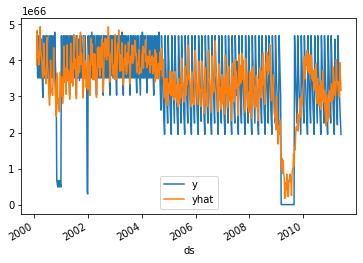

In [ ]:
t = pd.DataFrame(weekly_features.sort_values("forecast_error",ascending=False).iloc[0].fit_forecast)
t.plot(x='ds',y=["y","yhat"])

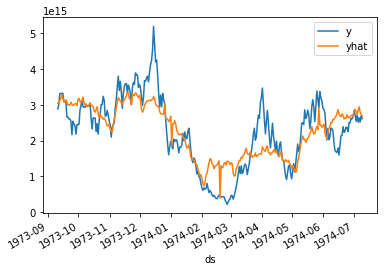

In [ ]:
t = pd.DataFrame(daily_features.sort_values("forecast_error",ascending=False).iloc[0].fit_forecast)
t.plot(x='ds',y=["y","yhat"])

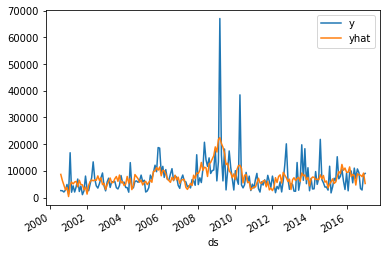

In [ ]:
t = pd.DataFrame(monthly_features.sort_values("forecast_error",ascending=False).iloc[0].fit_forecast)
t.plot(x='ds',y=["y","yhat"])

In [ ]:
monthly_features.iloc[4470].fit_forecast

IndexError: ignored


Trying Kullback Leibler divergence
---




Other features measure structural changes over time. The \level shift" is defined as the maximum difference in mean between consecutive blocks of 24  bservations.
Variance change" is computed similarly using variances, and the
Kullback-Leibler (KL) score is the maximum difference in KL
divergence (measured using kernel density estimation) between consecutive blocks of 48 observations. 

In [ ]:
row = m4_weekly.iloc[0]
clean_row = row.dropna()
data_points = clean_row.iloc[1:-6].apply(int)
if clean_row.SP == "Monthly":
  FREQ = "M"
elif clean_row.SP == "Daily":
  FREQ = "D"
elif clean_row.SP == "Weekly":
  FREQ = "W"
else: 
  raise Exception("Sampling error")

dates = pd.date_range(start=clean_row['StartingDate'], periods = len(data_points), freq=FREQ)
list_df = [(date,value) for date, value in zip(dates, data_points)]
df = pd.DataFrame(list_df).rename(columns={0:'ds',1:'raw'})

N = 365.25
date_delta = df['ds'].max()-df['ds'].min()

# Creating FB_prophet instance
# Disabling uncertainty samples for SPEED
m = Prophet(seasonality_mode='additive',uncertainty_samples=0)
m.add_country_holidays(country_name="US")

# Turns on  seasonality if there is >=10 years of history.
if date_delta > timedelta(days=365*10):
  m.add_seasonality(name='decadely', period=10*N, fourier_order=10)
# Turns on yearly seasonality if there is >=2 years of history.
if date_delta > timedelta(days=365*2):
  m.add_seasonality(name='yearly', period=N/1, fourier_order=15)
# Turns on quarterly seasonality if there is >=2 quarters of history
if date_delta > timedelta(days=365/2):
  m.add_seasonality(name='quarterly', period=N/4, fourier_order=10)
if date_delta > timedelta(days=60) and  FREQ not in ['M']:
  m.add_seasonality(name='monthly', period=N/12, fourier_order=10)
# Turns on weekly seasonality if there is >=2 weeks of history, and not monthly sample
if date_delta > timedelta(days=14) and  FREQ not in ['M','W']:
  m.add_seasonality(name='weekly', period=N/52, fourier_order=4)

pt = PowerTransformer(standardize=False)
pt.fit(df["raw"].to_frame())
if pt.lambdas_[0] > 0:
  df['power_transformed'] = pt.transform(df["raw"].to_frame())
  selected_column = "power_transformed"
else:
  selected_column = "raw"
df["y"]=df[selected_column]

m.fit(df[["ds","y"]])

forecast = m.predict(df)
forecast['y'] = df['y']
forecast['raw'] = df['raw']

# Calculate SMAPE
_num = abs(forecast['yhat'].values - df['y'].values)
_denom = (abs(forecast['yhat'].values) + abs(df['y'].values)) / 2
forecast_error = np.mean(_num/_denom)

# Residuals
forecast['residual'] = forecast['yhat'] - df["y"]

# Sum of seasonal components
forecast['all_seasons']=forecast[list(m.seasonalities.keys())].sum(axis=1)
numer = forecast['residual']
denom_trend = forecast['residual'] + forecast['trend']
denom_seasonality = forecast['residual'] + forecast['all_seasons']

f_trend_strength = max(0, 1 - numer.var()/denom_trend.var() )
f_all_seasonality_strength  = max(0, 1 - numer.var()/ denom_seasonality.var())

f_mean = df["raw"].mean()
f_variance = df["raw"].var()
f_autocorr1 = df["raw"].autocorr(1)

# Linearity feature: R square from a fitted linear regression.
f_linearity = TsFeatures.get_linearity(forecast['raw'].to_numpy())

# Entropy
# The spectral entropy is the Shannon entropy Base 2 gives the unit of bits
f_entropy = entropy(df["raw"].values, base=2)

# Divide a series into blocks of 24 observations to remove daily seasonality.
# Dropping the last group
SIZE=24
num_groups = math.floor(forecast['raw'].shape[0]/SIZE)
t = [i*np.ones(SIZE, dtype=int) for i in range(num_groups)]
group_24 = [int(item) for array in t for item in array]
forecast['Group_24'] = np.nan
forecast['Group_24'].iloc[:num_groups*SIZE] = group_24
windowed_observations_df = forecast[["raw","Group_24"]].groupby("Group_24").agg(list).reset_index(drop=True)

# Lumpiness: The variance of the variances across blocks measures the lumpiness
f_lumpiness = windowed_observations_df['raw'].apply(np.var).var()
# Level shift: The maximum difference in mean between consecutive blocks of 24 observations 
f_level_shift = windowed_observations_df['raw'].apply(np.mean).diff().abs().max()
# Variance change: The maximum difference in variances between consecutive blocks of 24 observations
f_variance_change = windowed_observations_df['raw'].apply(np.var).diff().abs().max()

# Peak
x = forecast["all_seasons"]
# Finds peaks of the seasonal component of the transformed time series.
peaks, _ = find_peaks(x, distance=10)
# Maps location of peaks to raw time series to find prominence.
prominences = peak_prominences(df["raw"], peaks)[0]
f_peak = np.sum(prominences) / f_mean

# Trough (negative of the series)
x = -(forecast["all_seasons"])
# Finds trough of the seasonal component of the transformed time series.
troughs, _ = find_peaks(x, distance=10)
# Maps location of peaks to raw time series to find prominence.
prominences = peak_prominences(df["raw"], troughs)[0]
f_trough = np.sum(prominences) / f_mean


# Crossing points: Number of times a time series crosses the mean line
f_cross_points = TsFeatures.get_crossing_points(forecast['raw'].to_numpy())

# Kullback-Leibler (KL) score is the maximum difference in KL divergence 
# (measured using kernel density estimation) between consecutive blocks of 48 observations. 


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:numba.core.transforms:finding looplift candidates


In [ ]:
from sklearn.neighbors import KernelDensity


In [ ]:
windowed_observations_df["KL"] = np.nan

for index, window in windowed_observations_df.iloc[1::2, :1].itertuples():
  q = windowed_observations_df["raw"].iloc[index]
  p = windowed_observations_df["raw"].iloc[index-1]
  kl_div = sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
  windowed_observations_df["KL"].iloc[index]=kl_div


In [ ]:
from scipy.special import rel_entr


In [ ]:
p_q = p + q
P = np.array(p).reshape(-1,1)
Q = np.array(q).reshape(-1,1)
sample_space = np.arange(math.floor(min(p_q)),math.ceil(max(p_q))).reshape(-1,1)
sample_space

array([[36379],
       [36380],
       [36381],
       ...,
       [40992],
       [40993],
       [40994]])

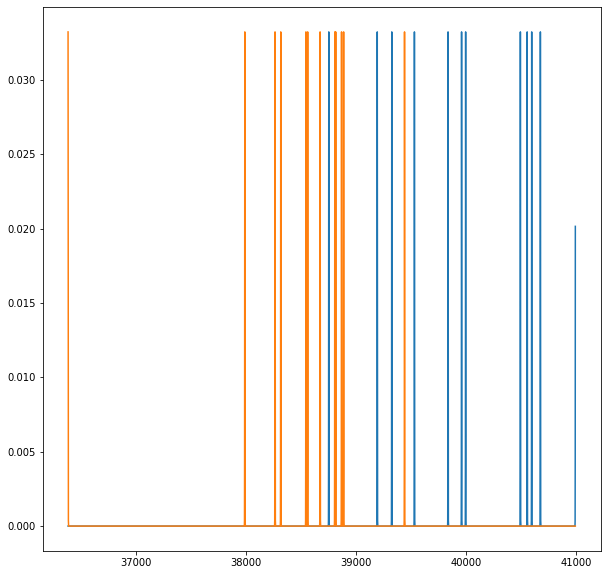

In [ ]:
kde_P = KernelDensity(kernel="gaussian").fit(P)
P_dens = kde_P.score_samples(sample_space)

kde_Q = KernelDensity(kernel="gaussian").fit(Q)
Q_dens = kde_Q.score_samples(sample_space)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(sample_space[:, 0], np.exp(P_dens))
ax.plot(sample_space[:, 0], np.exp(Q_dens))

In [ ]:
-2.81319540e+06

-2813195.4

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy(np.exp(P_dens) ,np.exp(Q_dens))

inf

In [ ]:
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))


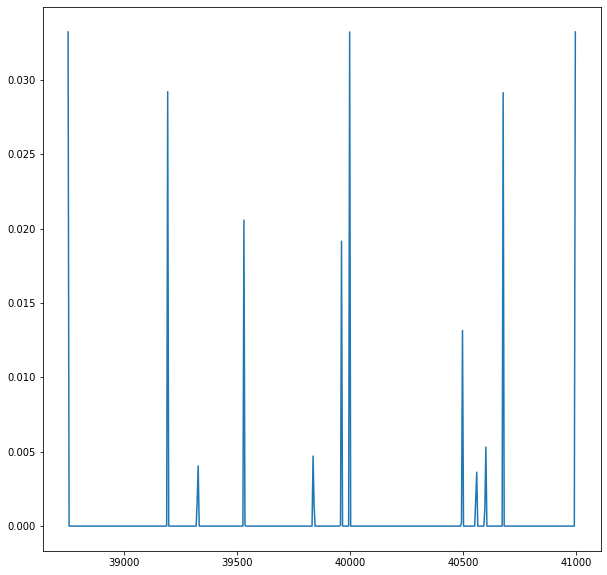

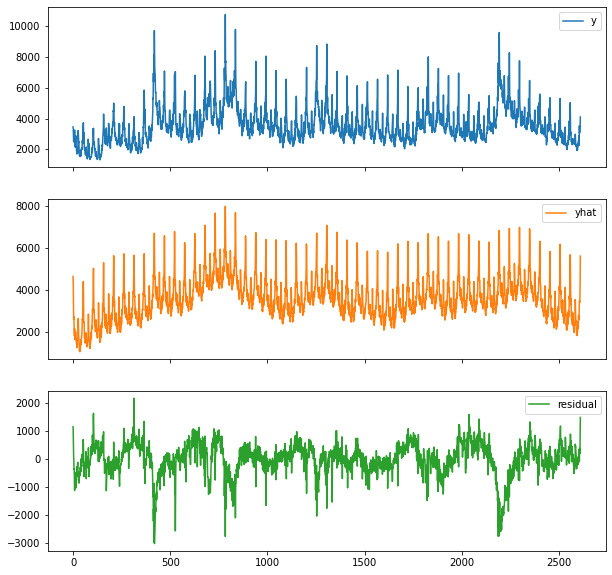

In [ ]:
p = pd.DataFrame(features_df_W.iloc[3].fit_forecast)
axes = p[["y","yhat","residual"]].plot(figsize=(10,10),subplots=True) 

Making Custom Time Series
---


For seasonal time series, we decomposed the transformed data using an stl decomposition with periodic seasonality.

For non-seasonal time series, we estimated the trend of the transformed data using penalized regression splines via the mgcv package.




In [ ]:
pt = PowerTransformer(standardize=False)
pt.fit(time_series)
time_series['Transformed'] = pt.transform(time_series)

df = time_series['Transformed'].reset_index().rename(columns={"Transformed":"y", "date":"ds"})
m = Prophet(seasonality_mode='additive',uncertainty_samples=0)
m.add_seasonality(name='daily', period=365.25/365.25, fourier_order=3)
m.add_seasonality(name='weekly', period=365.25/52, fourier_order=3)
m.add_seasonality(name='monthly', period=365.25/12, fourier_order=5)
m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=10)
m.add_seasonality(name='yearly', period=365.25/1, fourier_order=10)
m.fit(df)
forecast = m.predict(df)
forecast[['ds','yhat']].plot('ds','yhat')
diff = (time_series['Transformed'].values - forecast['yhat'].values)/time_series['Transformed'].values
np.mean(abs(diff))

NameError: ignored

In [ ]:
forecast['monthly'].plot()

In [ ]:
forecast.columns

In [ ]:
forecast['quarterly'].plot()

In [ ]:
forecast['yearly'].plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.DataFrame(columns=['trend','seasonality','noise'])
days = 700
df['trend'] = np.linspace(30, 400, days)
time = np.arange(0, days/10, 0.1);
df['seasonality'] = 600*np.sin(time) + 1000
mu, sigma = 0, 10
df['noise'] = np.random.normal(mu, sigma, days) 
NUM_SPIKES = 50
spike_index = [round(x) for x in np.linspace(1, days-1, NUM_SPIKES)]
df['spike'] = np.zeros(days)
df['spike'].iloc[spike_index] = 300

df['add_series'] = df['trend'] + df['seasonality'] + df['noise'] + df['spike']
df['mul_series'] = df['trend'] * df['seasonality'] + df['noise'] * 100 
df.index = pd.date_range(start='1/1/2018', periods=days)

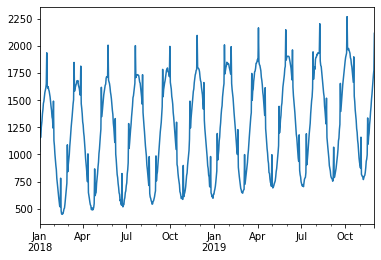

In [ ]:
df['add_series'].plot()

In [ ]:
df = df.reset_index().rename(columns={"index":"time", "mul_series": "value"})[["value","time"]]

In [ ]:
from kats.consts import TimeSeriesData
df_from_series  = TimeSeriesData(time=df.time, value=df.value)



In [ ]:
df_from_series.value = df_from_series.value.apply(int)

In [ ]:
df_from_series

,time,value
0,2018-01-01,29968
1,2018-01-02,33985
2,2018-01-03,35192
3,2018-01-04,38612
4,2018-01-05,39802
...,...,...
695,2019-11-27,486716
696,2019-11-28,509519
697,2019-11-29,531175
698,2019-11-30,550936


In [ ]:
TsFeatures.get_seasonalities(df_from_series)

{'residual_std': nan,
 'seasonal_period': nan,
 'seasonality_mag': nan,
 'trend_mag': nan}

In [ ]:
pt = PowerTransformer(standardize=True)
df['Transformed'] = pt.fit_transform(df['add_series'].to_frame())
#  = pt.transform(time_series['add_series'].to_frame())
if pt.lambdas_[0] > 0:
  selected_column = "Transformed"
else:
  selected_column = "values"

df = df[selected_column].reset_index().rename(columns={selected_column:"y", "index":"ds"})
m = Prophet(seasonality_mode='additive',uncertainty_samples=0)
m.add_country_holidays(country_name="US")
N = 365.25
# Turns on yearly seasonality if there is >=2 years of history.
# Turns on weekly seasonality if there is >=2 weeks of history, and the
# spacing between dates in the history is <7 days.
# Turns on daily seasonality if there is >=2 days of history, and the
# spacing between dates in the history is <1 day.
m.add_seasonality(name='daily', period=N/365.25, fourier_order=4)
m.add_seasonality(name='weekly', period=N/52, fourier_order=4)
m.add_seasonality(name='monthly', period=N/12, fourier_order=5)
m.add_seasonality(name='quarterly', period=N/4, fourier_order=10)
m.add_seasonality(name='yearly', period=N/1, fourier_order=20)


In [ ]:
m.fit(df)
forecast = m.predict(df)
# diff = (time_series[selected_column].values - forecast['yhat'].values)/time_series[selected_column].values
# np.mean(abs(diff))
df['residual'] = forecast['yhat'] - df["y"]
forecast['all_seasons']=forecast[['daily','weekly','monthly','quarterly','yearly']].sum(axis=1)

f_mean = df['y'].mean()
f_variance = df['y'].var()
f_autocorr1 = df['y'].autocorr(1)

numer = df['residual']
denom_trend = df['residual'] + forecast['trend']
denom_seasonality = df['residual'] + forecast['all_seasons']
f_trend_strength = max(0, 1 - numer.var()/denom_trend.var() )
f_all_seasonality_strength  = max(0, 1 - numer.var()/ denom_seasonality.var())

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


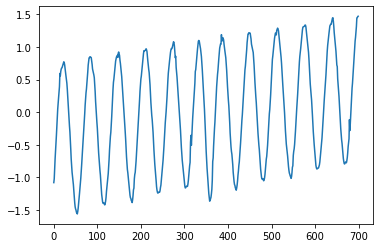

In [ ]:
forecast['yhat'].plot()